# Dimension reduction

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import *

## Similar medicine

In this exercice, we wish to identify medicine prescribed in similar situation.
For this purpose, we want to create a 2D embedding of medicines.
Identify how you can describe each medicine in high dimension, and apply dimension reduction on it.

In this exercice, we will describe medicines in term of the relative amount of prescription per medical specialty, age and sex of the patient.

In [ ]:
fn = ROOTDIR / 'data' / 'interim' / 'OPEN_MEDIC_2019.parquet'
df = pd.read_parquet(fn)
df.head()

ATC1                           l_ATC1 ATC2                        L_ATC2  \
0    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
1    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
2    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
3    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
4    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   

   ATC3                        L_ATC3   ATC4  \
0  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
1  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
2  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
3  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
4  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   

                                   L_ATC4     ATC5           L_ATC5  ...  \
0  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
1  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
2  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
3  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
4  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   

   TOP_GEN GEN_NUM age  sexe  BEN_REG  BOITES    REM     BSE  \
0        0       0   0     1        5     113  53.31  191.53   
1        0       0   0     1        5     152  77.60  258.68   
2        0       0   0     1        5      74  33.50  126.72   
3        0       0   0     1        5      13   6.56   21.87   
4        0       0   0     1       11     106  39.47  136.74   

                l_psp_spe       name  
0       MEDECINE GENERALE  ZYMAFLUOR  
1               PEDIATRIE  ZYMAFLUOR  
2  PRESCRIPTEURS SALARIES  ZYMAFLUOR  
3                  AUTRES  ZYMAFLUOR  
4       MEDECINE GENERALE  ZYMAFLUOR  

[5 rows x 22 columns]

In [ ]:
df['age'].value_counts()

60    810498
20    749238
0     258974
99     11149
Name: age, dtype: int64

In [ ]:
table = pd.pivot_table(df, index='name', columns=['l_psp_spe', 'age', 'sexe'], 
                      values='BOITES', aggfunc='sum', fill_value=0)
table

l_psp_spe        ANATOMIE-CYTOLOGIE-PATHOLOGIQUE        \
age                                           20    60   
sexe                                           1  2  2   
name                                                     
A313                                           0  0  0   
ABACAVIR                                       0  0  0   
ABACAVIR/LAM                                   0  0  0   
ABACAVIR/LAM/ZID                               0  0  0   
ABASAGLAR                                      0  0  0   
...                                          ... .. ..   
ZYMADUO                                        0  0  0   
ZYMAFLUOR                                      0  0  0   
ZYPREXA                                        0  0  0   
ZYRTEC                                         0  0  0   
ZYTIGA                                         0  0  0   

l_psp_spe        ANESTHESIOLOGIE - REANIMATION                 AUTRES  ...  \
age                                         0     20     60        0   ...   
sexe                                         1  2  1  2   1  2      1  ...   
name                                                                   ...   
A313                                         0  0  0  0   0  0      0  ...   
ABACAVIR                                     0  0  0  0   0  0      0  ...   
ABACAVIR/LAM                                 0  0  0  0   0  0      0  ...   
ABACAVIR/LAM/ZID                             0  0  0  0   0  0      0  ...   
ABASAGLAR                                    0  0  0  0   0  0      0  ...   
...                                        ... .. .. ..  .. ..    ...  ...   
ZYMADUO                                      0  0  0  0   0  0     12  ...   
ZYMAFLUOR                                    0  0  0  0   0  0   2946  ...   
ZYPREXA                                      0  0  0  0   0  0      0  ...   
ZYRTEC                                       0  0  0  0   0  0      0  ...   
ZYTIGA                                       0  0  0  0  27  0      0  ...   

l_psp_spe        VALEUR INCONNUE                                           
age                           0    20             60           99          
sexe                           9    1    2   9     1     2   9  1  2    9  
name                                                                       
A313                           0  343  639   0   456   449   0  0  0    0  
ABACAVIR                       0  210    0   0    34     0   0  0  0    0  
ABACAVIR/LAM                   0  654  257   0   613   142   0  0  0    0  
ABACAVIR/LAM/ZID               0   55    0   0     0     0   0  0  0    0  
ABASAGLAR                      0  943  707   0  1249  1216   0  0  0   22  
...                          ...  ...  ...  ..   ...   ...  .. .. ..  ...  
ZYMADUO                        0  185  191   0    89   262   0  0  0    0  
ZYMAFLUOR                      0  582  709   0   456   391   0  0  0    0  
ZYPREXA                        0  997  694  35  1676  1198  36  0  0  178  
ZYRTEC                         0  239  441  21   191   361  23  0  0    0  
ZYTIGA                         0  759    0   0  1090     0   0  0  0   26  

[1967 rows x 164 columns]

In [ ]:
total_sold = table.sum(axis=1)
total_sold

name
A313                 42606
ABACAVIR              2938
ABACAVIR/LAM         57228
ABACAVIR/LAM/ZID       483
ABASAGLAR           709122
                     ...  
ZYMADUO             346364
ZYMAFLUOR            55905
ZYPREXA             128786
ZYRTEC               65715
ZYTIGA               78046
Length: 1967, dtype: int64

In [ ]:
# Here the reshape is meant to allow broadcasting : https://numpy.org/devdocs/user/theory.broadcasting.html
table = table / total_sold.values.reshape(-1, 1)
table

l_psp_spe        ANATOMIE-CYTOLOGIE-PATHOLOGIQUE            \
age                                           20        60   
sexe                                           1    2    2   
name                                                         
A313                                         0.0  0.0  0.0   
ABACAVIR                                     0.0  0.0  0.0   
ABACAVIR/LAM                                 0.0  0.0  0.0   
ABACAVIR/LAM/ZID                             0.0  0.0  0.0   
ABASAGLAR                                    0.0  0.0  0.0   
...                                          ...  ...  ...   
ZYMADUO                                      0.0  0.0  0.0   
ZYMAFLUOR                                    0.0  0.0  0.0   
ZYPREXA                                      0.0  0.0  0.0   
ZYRTEC                                       0.0  0.0  0.0   
ZYTIGA                                       0.0  0.0  0.0   

l_psp_spe        ANESTHESIOLOGIE - REANIMATION                                \
age                                         0         20             60        
sexe                                         1    2    1    2         1    2   
name                                                                           
A313                                       0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR                                   0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR/LAM                               0.0  0.0  0.0  0.0  0.000000  0.0   
ABACAVIR/LAM/ZID                           0.0  0.0  0.0  0.0  0.000000  0.0   
ABASAGLAR                                  0.0  0.0  0.0  0.0  0.000000  0.0   
...                                        ...  ...  ...  ...       ...  ...   
ZYMADUO                                    0.0  0.0  0.0  0.0  0.000000  0.0   
ZYMAFLUOR                                  0.0  0.0  0.0  0.0  0.000000  0.0   
ZYPREXA                                    0.0  0.0  0.0  0.0  0.000000  0.0   
ZYRTEC                                     0.0  0.0  0.0  0.0  0.000000  0.0   
ZYTIGA                                     0.0  0.0  0.0  0.0  0.000346  0.0   

l_psp_spe           AUTRES  ... VALEUR INCONNUE                                \
age                     0   ...              0         20                       
sexe                     1  ...               9         1         2         9   
name                        ...                                                 
A313              0.000000  ...             0.0  0.008051  0.014998  0.000000   
ABACAVIR          0.000000  ...             0.0  0.071477  0.000000  0.000000   
ABACAVIR/LAM      0.000000  ...             0.0  0.011428  0.004491  0.000000   
ABACAVIR/LAM/ZID  0.000000  ...             0.0  0.113872  0.000000  0.000000   
ABASAGLAR         0.000000  ...             0.0  0.001330  0.000997  0.000000   
...                    ...  ...             ...       ...       ...       ...   
ZYMADUO           0.000035  ...             0.0  0.000534  0.000551  0.000000   
ZYMAFLUOR         0.052697  ...             0.0  0.010411  0.012682  0.000000   
ZYPREXA           0.000000  ...             0.0  0.007742  0.005389  0.000272   
ZYRTEC            0.000000  ...             0.0  0.003637  0.006711  0.000320   
ZYTIGA            0.000000  ...             0.0  0.009725  0.000000  0.000000   

l_psp_spe                                                          
age                     60                      99                 
sexe                     1         2        9    1    2         9  
name                                                               
A313              0.010703  0.010538  0.00000  0.0  0.0  0.000000  
ABACAVIR          0.011572  0.000000  0.00000  0.0  0.0  0.000000  
ABACAVIR/LAM      0.010712  0.002481  0.00000  0.0  0.0  0.000000  
ABACAVIR/LAM/ZID  0.000000  0.000000  0.00000  0.0  0.0  0.000000  
ABASAGLAR         0.001761  0.001715  0.00000  0.0  0.0  0.000031  
...                    ...       ...    

In [ ]:
from umap import UMAP
red = UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=20)

In [ ]:
transformed = red.fit_transform(table)

/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


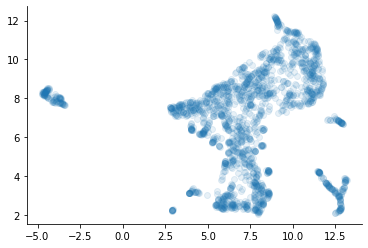

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[:,0], transformed[:,1], alpha=0.1);

With this embedding we can already perform several observations on this dataset.
First, there are 3 small clusters of very independent medicine.
The third cluster also has this Y shape, which seems to indicate that there is a hierarchy within this cluster.
Then we have a very large cluster in the center with medicines which tend to be used in multiple situation.
However, this cluster is not spherical, this is indicative of structure within the cluster. 
Again, if one was interested in the topic, it would be nice to understand the specificities of each clusters.

In the long history of studies of this dataset, we will once again focus on doliprane.
We will see where the analgesics lie in this embedding, and specifically the doliprane.
We observe that most analgesics lie in the top middle of the central cluster, in the same area as the doliprane (in black).
There is definitely a meaning in this representation.
Even the highly addictive morphine (in green) is close to doliprane.
Conversely, some analgesics are extremely far from the rest and may be of specific interest.

In [ ]:
analgesiques = table.index.isin(df.loc[df['ATC2']=='N02', 'name'].drop_duplicates())
doliprane = table.index == 'DOLIPRANE'
morphine = table.index == 'MORPHINE'

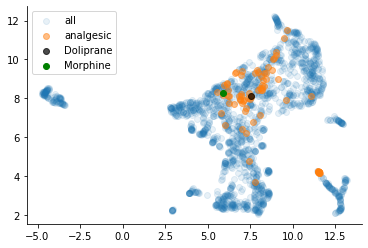

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[~analgesiques,0], transformed[~analgesiques,1], alpha=0.1, label='all')
ax.scatter(transformed[analgesiques,0], transformed[analgesiques,1], alpha=0.5, label='analgesic')
ax.scatter(transformed[doliprane,0], transformed[doliprane,1], alpha=0.7, color='black', label='Doliprane')
ax.scatter(transformed[morphine,0], transformed[morphine,1], alpha=1, color='green', label='Morphine')
ax.legend();

In this example, we have made an aribitrary choice of the high dimensional space, and of a metric.
For both these choices, there are many possible variations which will tell different stories.
In an exploration phase, it would be interesting to test multiple combinations.

## Similar patients
We have observed during the course on missing values that the patient dataset has many missing values, and that some missing values are correlated.
We have assumed that features are related to a set of symptoms or medical exam.
Apply dimension reduction on the binary variables of missing values to identify patients with similar pathologies.

In this exercice, we will create a new DataFrame which contains only wether a piece of information is present or not.
We can then apply dimension reduction to this dataset to identify patients which seemed to have had the same exams.

In [ ]:
fn = ROOTDIR / 'data' / 'interim' / 'patient.parquet'
df = pd.read_parquet(fn)
print(df.shape)
df.head()

(13533, 32)


age sex  visit_id    feat_0    feat_1    feat_5    feat_9   feat_11  \
0   87   F      1226       NaN -1.979758 -2.265400       NaN -0.208635   
1   76   F      1194       NaN       NaN -0.222855       NaN -0.420816   
2   57   M      2141       NaN       NaN  1.109240  0.970227  1.495582   
3    6   F      1750       NaN       NaN  1.642081       NaN -0.381453   
4   63   M     11049  3.279681       NaN  1.730885       NaN  0.189952   

   feat_12  feat_13  ...  feat_29  feat_30   feat_31  feat_32   feat_34  \
0      NaN      NaN  ...      NaN      NaN       NaN      NaN  0.912238   
1      NaN      NaN  ...      NaN      NaN       NaN      NaN -1.231702   
2      NaN      NaN  ...      NaN      NaN  0.148950      NaN  0.095499   
3      NaN      NaN  ...      NaN      NaN       NaN      NaN -1.333794   
4      NaN      NaN  ...      NaN      NaN  0.432363      NaN -1.946348   

   feat_35  feat_36  feat_37   feat_38  feat_39  
0      NaN      NaN      NaN       NaN      NaN  
1      NaN      NaN      NaN       NaN      NaN  
2      NaN      NaN      NaN       NaN      NaN  
3      NaN      NaN      NaN       NaN      NaN  
4      NaN      NaN      NaN  1.214093      NaN  

[5 rows x 32 columns]

In [ ]:
feat_df = df[[c for c in df.columns if c.startswith('feat')]]
feat_df = feat_df.isnull().astype(np.int8)
feat_df.head()

feat_0  feat_1  feat_5  feat_9  feat_11  feat_12  feat_13  feat_14  \
0       1       0       0       1        0        1        1        1   
1       1       1       0       1        0        1        1        1   
2       1       1       0       0        0        1        1        0   
3       1       1       0       1        0        1        1        1   
4       0       1       0       1        0        1        1        0   

   feat_15  feat_16  ...  feat_29  feat_30  feat_31  feat_32  feat_34  \
0        1        0  ...        1        1        1        1        0   
1        1        0  ...        1        1        1        1        0   
2        1        0  ...        1        1        0        1        0   
3        1        0  ...        1        1        1        1        0   
4        0        0  ...        1        1        0        1        0   

   feat_35  feat_36  feat_37  feat_38  feat_39  
0        1        1        1        1        1  
1        1        1        1        1        1  
2        1        1        1        1        1  
3        1        1        1        1        1  
4        1        1        1        0        1  

[5 rows x 29 columns]

In [ ]:
from umap import UMAP
red = UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=20)

In [ ]:
transformed = red.fit_transform(feat_df)
np.save(ROOTDIR / 'data' / 'interim' / 'patient_empty_reduction.npy', transformed)

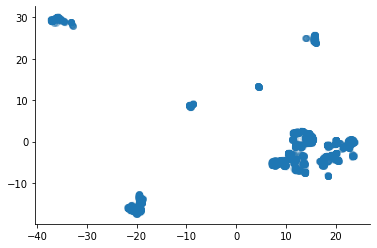

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[:,0], transformed[:,1], alpha=0.05);

We observe multiple clusters of patients scattered across the map.
We have multiple groups of patients that have had similar features missing.
Further analysis would help to identify what those clusters are made of.
It is important to notice that these clusters do not take into account the actual values of these features, only the fact that they are present or missing. 
They can be complementary information to consider.

### Correlation

In the correlation course, we have seen two ways to estimate how variables are related.
Identify how dimension reduction algorithms can also be used as a different measure of correlation.
Apply the technique to the cancer dataset.

As a second step, imagine how the traditionnal correlation measures can be used as a distance metric for an algorithm.
Compare this strategy to the first one.

In [ ]:
cancer = pd.read_parquet(ROOTDIR / 'data'/'raw'/'breast_cancer.parquet')
print(cancer.shape)
cancer.head()

(569, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
to_train = StandardScaler().fit_transform(cancer.drop(columns='diagnosis'))

In [ ]:
from umap import UMAP
red = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=20)

In [ ]:
transformed = red.fit_transform(to_train.T)

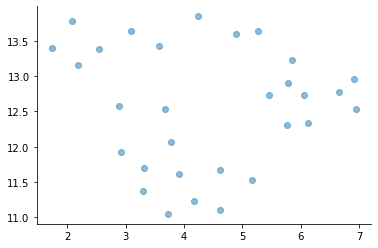

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[:,0], transformed[:,1], alpha=0.5);

We see that some features are sligthly packed together, separated by large void.
In order to study the meaning of features close together, let's try to look at radius and perimeter, which we know are extremely correlated.

In [ ]:
mask = np.array([ x in ['radius_mean', 'perimeter_mean'] for x in cancer.columns[1:]])

In [ ]:
# Look at the respective position of radius and perimeter 
fig, ax = plt.subplots()
ax.scatter(transformed[~mask,0], transformed[~mask,1]);
ax.scatter(transformed[mask,0], transformed[mask,1]);

These two features are relatively close together.
Let's now look at the features which belong to their cluster.

In [ ]:
cluster_radius = (transformed[:,0]>5)&(transformed[:,0]<6.5)&(transformed[:,1]>12)&(transformed[:,1]<13.3)

In [ ]:
cluster_cols = cancer.columns[1:][cluster_radius]
cluster_cols

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')

This makes a lot of sense.
All the variables in this cluster are actually tightly related by mathematical formula.

In this example, the euclidian distance is used on the normalised data.
However, there are many distances that can be used.
For example, we could use the correlation as a notion of similarity between two features.
We can provide UMAP with the precomputed distance.
Here the we define the distance between two features to be maximal if the correlation is null.
Two features with a large positive or negative correlation can be considered close together.

In [ ]:
from scipy.stats import spearmanr
dist = 1 - np.abs(spearmanr(to_train)[0])

In [ ]:
red = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=20, metric='precomputed')

In [ ]:
transformed = red.fit_transform(dist)

/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/umap/umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


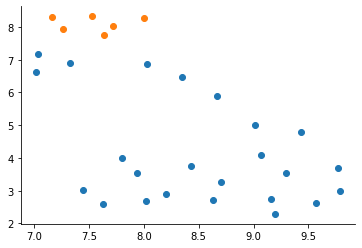

In [ ]:
fig, ax = plt.subplots()
ax.scatter(transformed[~cluster_radius,0], transformed[~cluster_radius,1]);
ax.scatter(transformed[cluster_radius,0], transformed[cluster_radius,1]);

With this strategy, we get a different map (because the distance is different), but variables in the former radius cluster still belong to some kind of a cluster.